In [ ]:
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END
from typing import TypedDict,Annotated, Literal
import operator
from dotenv import load_dotenv
from pydantic import BaseModel,Field
load_dotenv()
from langgraph.checkpoint.memory import InMemorySaver
from langchain_core.messages import BaseMessage

In [13]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
)

E0000 00:00:1758875993.934029   80415 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


In [14]:
# llm=ChatOpenAI(model="gpt-4o-mini")

class info(TypedDict):
    topic: str
    summary: str
    key_terms : str
    


In [ ]:
def generate_summary(state: info) -> info:
    prompt= f"On the give topic {state['topic']}, generate a concise summary describing the topic in brief"
    response= llm.invoke(prompt)
    return {"summary": response.content}

def generate_key_terms(state: info) -> info:
    prompt= f"On the give topic {state['topic']}, generate a list of key terms related to the topic"
    response= llm.invoke(prompt)
    print(type(response))
    print(response)
    return {"key_terms": response.content}



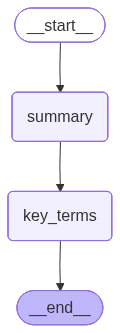

In [19]:
graph=StateGraph(info)
graph.add_node("summary", generate_summary)
graph.add_node("key_terms", generate_key_terms)

graph.add_edge(START, "summary")
graph.add_edge("summary", "key_terms")
graph.add_edge("key_terms", END)

checkpoint_saver = InMemorySaver()
graph.compile(checkpointer=checkpoint_saver)

In [ ]:
config={"configurable":{"thread_id":"first_thread"}}
workflow= graph.compile(checkpointer=checkpoint_saver)
final_state= workflow.invoke({"topic": "Artificial Intelligence"},config=config1)

<class 'langchain_core.messages.ai.AIMessage'>
**Artificial Intelligence (AI)** refers to the simulation of human intelligence in machines. It's about developing systems that can learn, reason, perceive, understand language, and make decisions, enabling them to perform tasks that typically require human intellect.
<class 'langchain_core.messages.ai.AIMessage'>
content='Here\'s a list of key terms related to Artificial Intelligence, categorized for clarity:\n\n---\n\n### **Core Concepts & Subfields**\n\n1.  **Artificial Intelligence (AI):** The overarching field of creating machines that can perform tasks that typically require human intelligence.\n2.  **Machine Learning (ML):** A subset of AI that enables systems to learn from data without being explicitly programmed.\n3.  **Deep Learning (DL):** A subset of Machine Learning that uses artificial neural networks with multiple layers to learn from data.\n4.  **Artificial General Intelligence (AGI) / Strong AI:** Hypothetical AI with huma

In [21]:
config1={"configurable":{"thread_id":"second_thread"}}
workflow= graph.compile(checkpointer=checkpoint_saver)
final_state= workflow.invoke({"topic": "Fruits"},config=config1)

<class 'langchain_core.messages.ai.AIMessage'>
Fruits are the mature, seed-bearing structures of flowering plants, primarily designed for seed dispersal. Highly valued as a global food source, they offer a wide array of flavors, textures, and essential nutrients like vitamins, minerals, and fiber, contributing significantly to a healthy diet.
<class 'langchain_core.messages.ai.AIMessage'>
content='Here\'s a list of key terms related to the topic "Fruits":\n\n**Botanical & Biological:**\n1.  **Botanical Fruit:** The mature ovary of a flowering plant, containing the seed or seeds.\n2.  **Pericarp:** The wall of the ripened ovary, which protects the seed(s).\n3.  **Exocarp/Epicarp:** The outermost layer of the pericarp (the skin).\n4.  **Mesocarp:** The middle layer of the pericarp (often the fleshy part).\n5.  **Endocarp:** The innermost layer of the pericarp (surrounds the seed, e.g., the pit of a peach).\n6.  **Seed:** The embryonic plant enclosed in a protective outer covering.\n7.  *

In [ ]:
config={"configurable":{"thread_id":"first_thread"}}
config1={"configurable":{"thread_id":"second_thread"}}

list(workflow.get_state_history(config1))




[StateSnapshot(values={'topic': 'Fruits', 'summary': AIMessage(content='Fruits are the mature, seed-bearing structures of flowering plants, primarily designed for seed dispersal. Highly valued as a global food source, they offer a wide array of flavors, textures, and essential nutrients like vitamins, minerals, and fiber, contributing significantly to a healthy diet.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--1728d982-f0a3-470a-80c3-760d684d3222-0', usage_metadata={'input_tokens': 16, 'output_tokens': 845, 'total_tokens': 861, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 790}}), 'key_terms': AIMessage(content='Here\'s a list of key terms related to the topic "Fruits":\n\n**Botanical & Biological:**\n1.  **Botanical Fruit:** The mature ovary of a flowering plant, containing the seed or seeds.\n2.  **Pe